In [1]:
import pandas as pd
import numpy as np

df_coffee = pd.read_feather("resources/coffee_ratings_full.feather")

<Axes: xlabel='sample_size'>

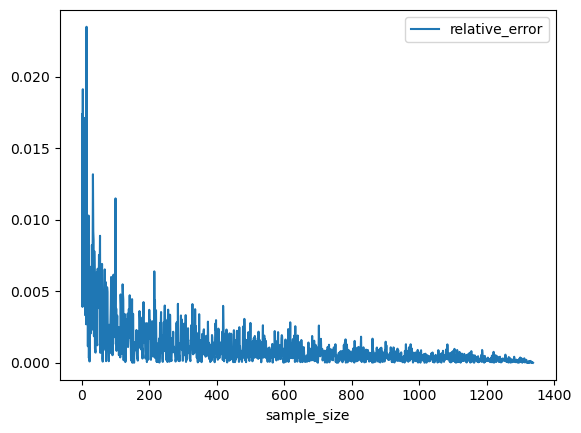

In [2]:
df_error = pd.DataFrame(columns=["sample_size", "relative_error"])

pop_mean = df_coffee["total_cup_points"].mean()

for num_of_rows in range(1, len(df_coffee) + 1):
    rel_err = np.abs(pop_mean - df_coffee.sample(n=num_of_rows)["total_cup_points"].mean()) / pop_mean
    df_error.loc[len(df_error.index)] = [num_of_rows, rel_err]

df_error.plot(x="sample_size", y="relative_error", kind="line")

In [3]:
mean_cup_points = []

for i in range(1000):
    mean_cup_points.append(df_coffee.sample(n=30)['total_cup_points'].mean())
mean_cup_points

[82.15833333333333,
 82.503,
 82.44733333333332,
 82.373,
 82.21666666666667,
 82.56933333333333,
 81.242,
 82.24166666666666,
 82.248,
 81.59800000000001,
 83.023,
 82.08866666666667,
 81.26233333333334,
 82.13666666666667,
 80.886,
 81.99733333333333,
 82.08666666666666,
 82.41233333333334,
 82.10300000000001,
 82.44966666666666,
 81.82533333333332,
 81.69933333333333,
 82.22000000000001,
 82.089,
 82.11666666666665,
 81.92233333333333,
 81.75566666666667,
 82.23366666666666,
 82.642,
 80.88133333333333,
 82.41300000000001,
 81.51800000000001,
 81.59633333333333,
 82.36933333333333,
 82.27300000000001,
 82.31400000000001,
 82.031,
 82.725,
 81.74733333333334,
 82.78999999999999,
 82.49933333333333,
 82.14533333333334,
 83.02533333333332,
 82.14133333333332,
 82.60600000000001,
 82.22,
 82.30366666666669,
 82.142,
 82.24066666666667,
 81.46666666666667,
 82.07533333333332,
 82.075,
 82.155,
 82.46433333333334,
 81.54766666666667,
 82.72366666666667,
 82.82233333333333,
 82.614,
 82.48

In [4]:
#Eğer elinizde birden fazla nesne olup bunların birbirleriyle iterasyonunu oluşturmak istiyorsanız
import itertools as it

dice = {
    "die1": [1,2,3,4,5,6],
    "die2": [1,2,3,4,5,6],
    "die3": [1,2,3,4,5,6],
    "die4": [1,2,3,4,5,6],
}
result = pd.DataFrame(it.product(*dice.values()), columns=dice.keys())
result

,die1,die2,die3,die4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
1291,6,6,6,2
1292,6,6,6,3
1293,6,6,6,4
1294,6,6,6,5


In [5]:
#Dört atışın ortalamasını, dataframe'imimize mean_roll adında bir sütun ekleyererk ele alırız
result['mean_roll'] = (result.die1 + result.die2 + result.die3 + result.die4) / 4
result

,die1,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


In [6]:
#Tam örnekleme dağılımı(Exact sampling distribution)
#mean_roll dağılımını görmenin en iyi yolu bir çubuk grafik çizmektir. Öncelikle mean_roll kategoriye dönüştürülür ve bar grafiği çizilir.
#Bu, prtalama atışın tam örneklmee dağılımıdır çünkü her bir zar atış kombinasyonunu içerir.

result['mean_roll'] = result['mean_roll'].astype('category')
result['mean_roll'] = result['mean_roll'].value_counts().sort_index()

<Axes: xlabel='n_dice', ylabel='n_outcomes'>

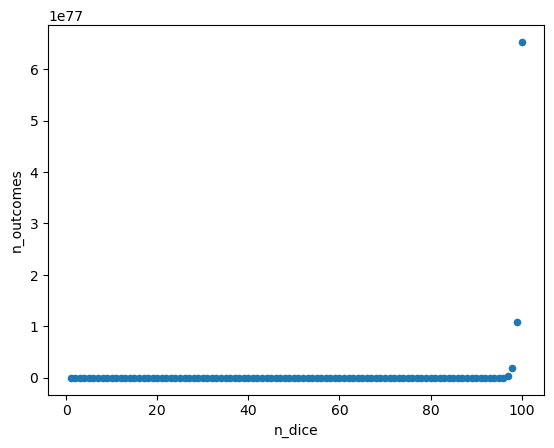

In [7]:
#aşağıdaki kod zarların tüm kombinasyonunu içerdiğinden ortalama silindirin tam örnekleme dağılımıdır.
n_dice = list(range(1,101))
n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)

outcomes = pd.DataFrame({
    'n_dice':n_dice,
    'n_outcomes':n_outcomes
})

outcomes.plot(x='n_dice', y='n_outcomes', kind='scatter')

In [8]:
#Dört zar atışının ortalamasının simülasyonu
sample_means_1000 = []
dice_values = list(range(1, 7)) 

for i in range(1000):
    sample = np.random.choice(dice_values, size=4, replace=True)
    sample_mean = sample.mean()
    sample_means_1000.append(sample_mean)

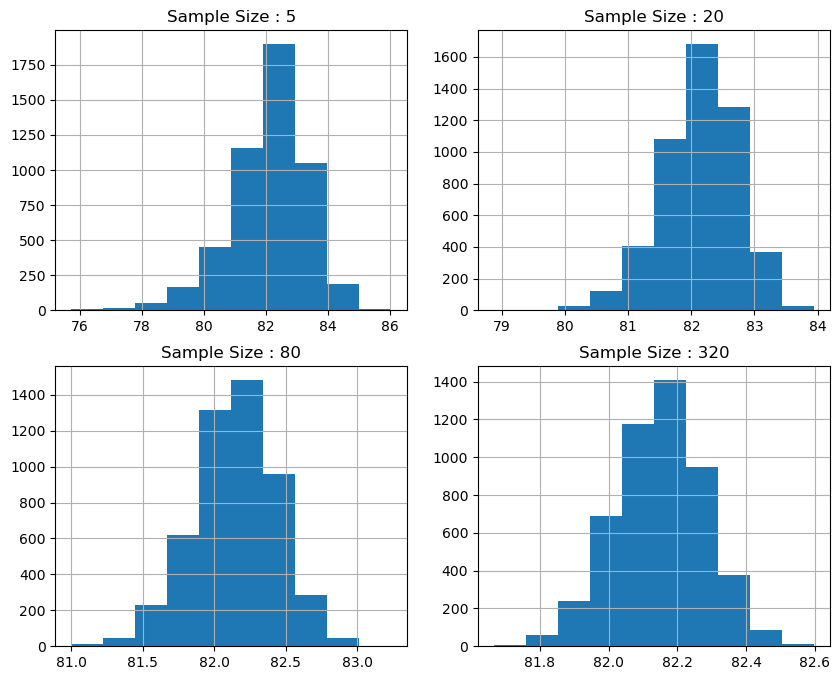

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Sample Size : 5
mean_cup_points_5 = []

for i in range(5000):
    mean_cup_points_5.append(df_coffee.sample(n=5)['total_cup_points'].mean())

axs[0, 0].hist(mean_cup_points_5)
axs[0, 0].set_title('Sample Size : 5')
axs[0, 0].grid(True)


# Sample Size : 20
mean_cup_points_20 = []

for i in range(5000):
    mean_cup_points_20.append(df_coffee.sample(n=20)['total_cup_points'].mean())

axs[0, 1].hist(mean_cup_points_20)
axs[0, 1].set_title('Sample Size : 20')
axs[0, 1].grid(True)

# Sample Size : 80
mean_cup_points_80 = []

for i in range(5000):
    mean_cup_points_80.append(df_coffee.sample(n=80)['total_cup_points'].mean())

axs[1, 0].hist(mean_cup_points_80)
axs[1, 0].set_title('Sample Size : 80')
axs[1, 0].grid(True)

# Sample Size : 320
mean_cup_points_320 = []

for i in range(5000):
    mean_cup_points_320.append(df_coffee.sample(n=320)['total_cup_points'].mean())

axs[1, 1].hist(mean_cup_points_320)
axs[1, 1].set_title('Sample Size : 320')
axs[1, 1].grid(True)